<h1> Pronósticos </h1>

In [2]:
library(ggplot2)
library(xts)
library(forecast)
library(dplyr)
library(tseries)
library(zoo)
library(quantmod)
library(nortest) #Para pruebas de normalidad
library(TTR)
setwd("C:\\Users\\81799\\OneDrive\\Documentos\\ESFM_CLASES\\Servicio Social ARTF\\Machine Learning\\section1\\ARTF_2017_2020\\ABRIL_ARTF")
Ton_Netas_P <- read.csv("Toneladas_Netas__Productos_2014_2022.csv")#Leer DF
Ton_Netas_P <- Ton_Netas_P[-99,]#Elimino la última fila
Ton_Netas_P$X <- as.yearmon(as.factor(Ton_Netas_P$X), format ="%m/%Y")
T_N_Pro  <- Ton_Netas_P # Contiene las fechas
Ton_Netas_P <- xts(Ton_Netas_P[,c(2:6)], order.by = Ton_Netas_P$X )
T_N_P <-  data.frame(Ton_Netas_P) #Ordeno por fechas y la trae como indice
Maiz_ts <- ts(T_N_P[,1], frequency = 12, star = c(2014,1))

<h1> Predicción dada la función ets() </h1>

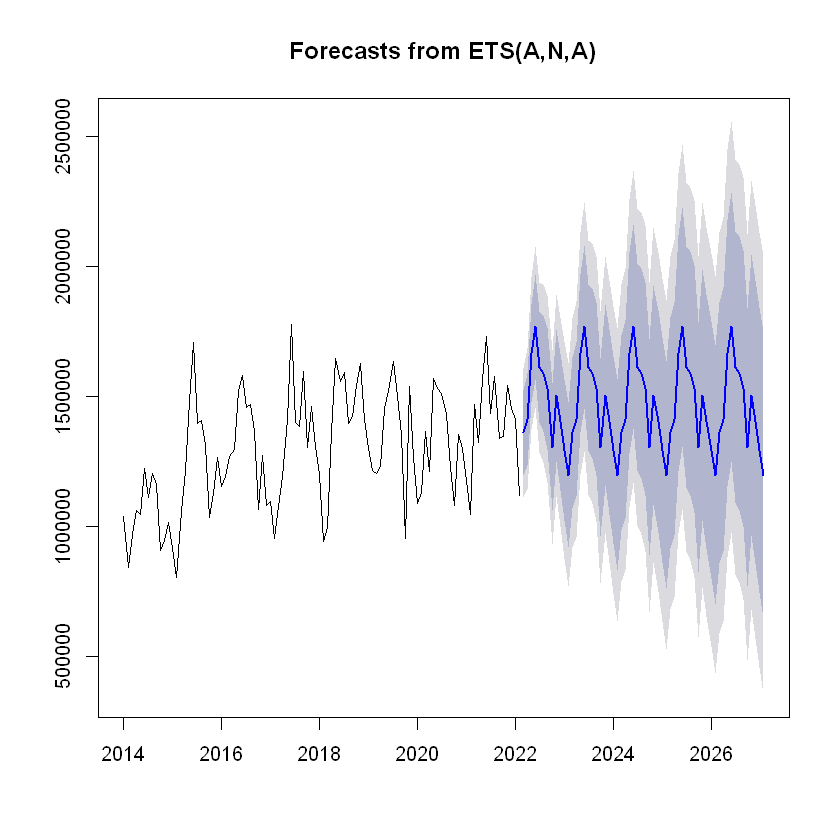

In [44]:
Suavizado_Maiz_R <- ets(Maiz_ts, model = "ZZZ")
Pronostico_Maiz_ETS  <- forecast(Suavizado_Maiz_R, h=60)  # Hace el pronóstico de 1 año
plot(Pronostico_Maiz_ETS)  #Nos hace la gráfica

In [45]:
Pronostico_Maiz_ETS  <- data.frame(Pronostico_Maiz_ETS)
Pronostico_Maiz_ETS_ts <- ts(Pronostico_Maiz_ETS$Point.Forecast, frequency = 12, star = c(2022,3)) #Primer Pronóstico

<h1> Predicción por medio de Holt_Winter </h1>

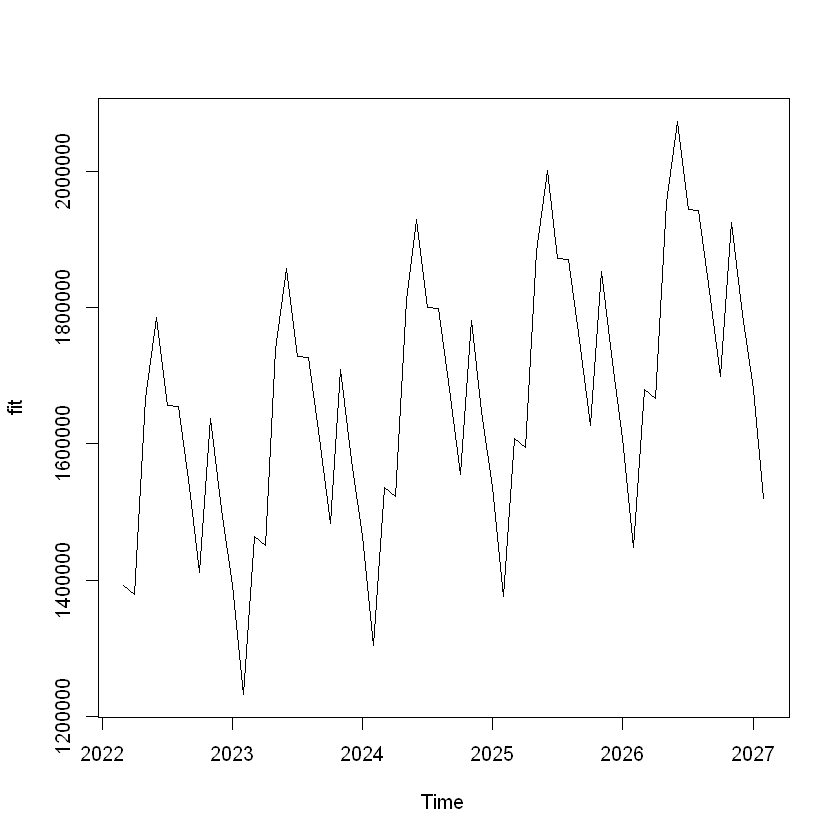

In [51]:
Maiz_H_W  <- HoltWinters(Maiz_ts)
prediccion_H_W =predict(Maiz_H_W,60)
Pronostico_H_W <- ts(data.frame(predict(Maiz_H_W,60)), frequency = 12,
                    star =c(2022,3))
plot(Pronostico_H_W)

<h1> Pronóstico utilizando auto.arima() </h1>

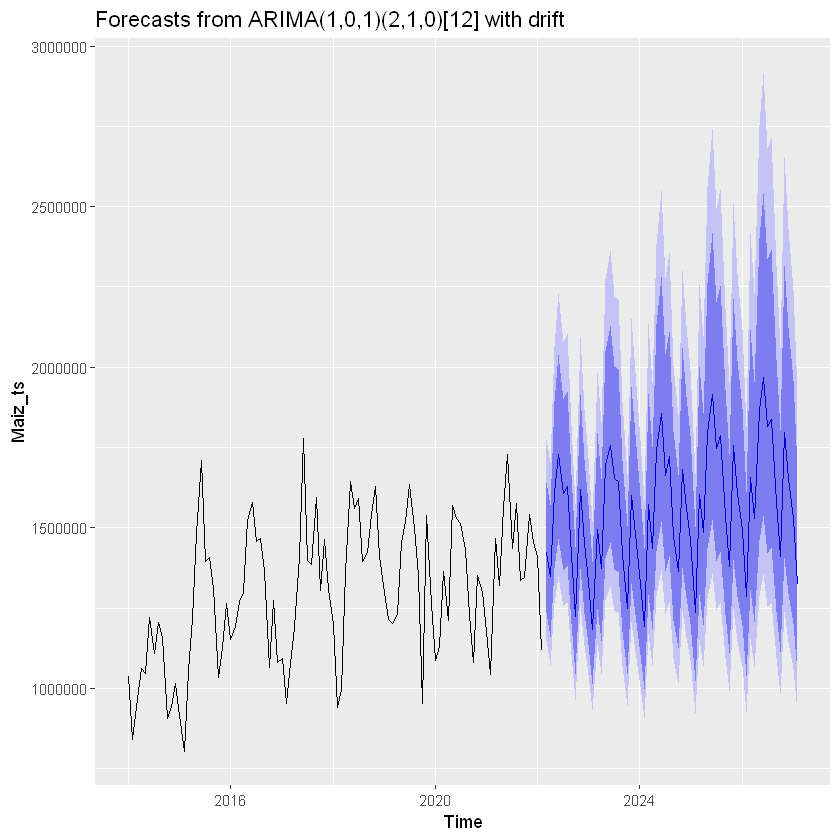

In [35]:
Arima_automatico_R <- auto.arima(Maiz_ts, lambda = "auto")
Pronostico_auto_Arima <- forecast(Arima_automatico_R, h=60)
autoplot(Pronostico_auto_Arima )

In [40]:
Pronostico_auto_Arima <- data.frame(Pronostico_auto_Arima)
Pronostico_auto_Arima_ts <- ts(Pronostico_auto_Arima$Point.Forecast, frequency = 12, star = c(2022,3)) #Primer Pronóstico

[1] "ts"

<h1> Pronóstico utilizando SARIMA(1,1,1)(1,1,1)[12] </h1> 

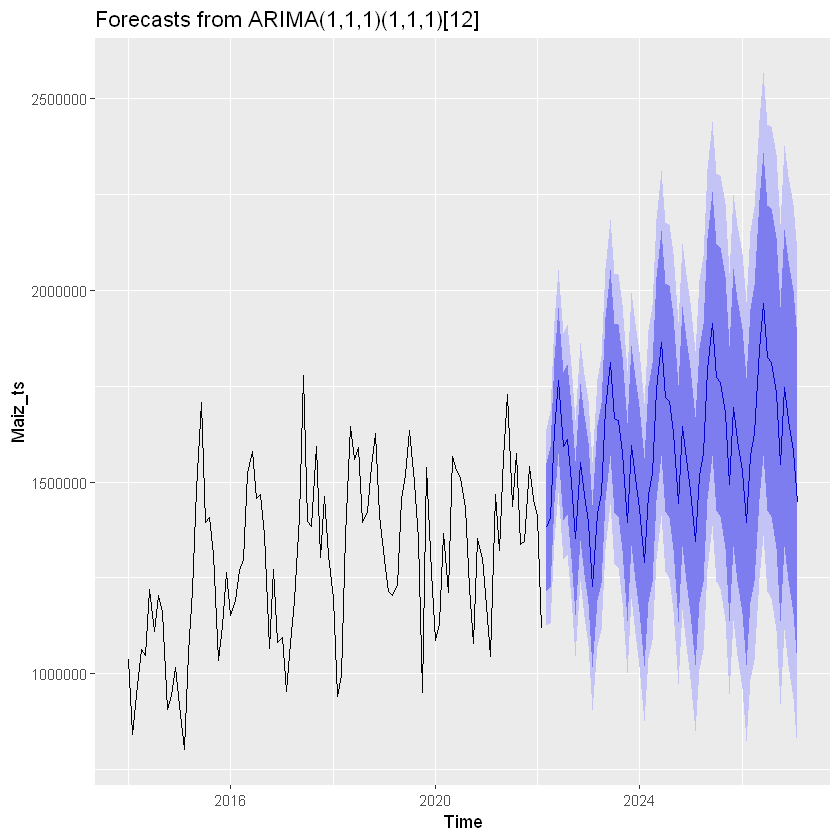

In [34]:
SARIMA_4<- arima(Maiz_ts,order=c(1,1,1), seasonal = list(order=c(1,1,1)))
Pronostico_SARIMA <- forecast(SARIMA_4, h=60)
autoplot(Pronostico_SARIMA )

In [58]:
Pronostico_SARIMA <- data.frame(Pronostico_SARIMA)
Pronostico_SARIMA_ts <- ts(Pronostico_SARIMA$Point.Forecast, frequency = 12,
                           start =c(2022,3))

<h1> Unión de pronósticos </h1>

In [106]:
Pronosticos <- cbind(Pronostico_Maiz_ETS_ts,Pronostico_auto_Arima_ts,
                    Pronostico_H_W,Pronostico_SARIMA_ts) #Para graficar los pronósticos
Pronosticos_tabla <- data.frame(Pronosticos)
Fecha <- read.csv("Fechas_prediccion.csv")
Pronosticos_tabla["Fecha"]=Fecha
Pronosticos_tabla = Pronosticos_tabla[,c(5,1:4)]
Pronosticos_tabla

Fecha,Pronostico_Maiz_ETS_ts,Pronostico_auto_Arima_ts,Pronostico_H_W,Pronostico_SARIMA_ts
03/2022,1358901,1423619,1392310,1380818
04/2022,1411741,1347140,1378603,1407499
05/2022,1665017,1610709,1666292,1634268
06/2022,1767237,1727214,1786091,1764574
07/2022,1611548,1607550,1656689,1592926
08/2022,1587120,1627400,1655248,1611840
09/2022,1528756,1413268,1536163,1499850
10/2022,1303272,1224287,1411248,1352351
11/2022,1504711,1618009,1637760,1552243
12/2022,1401595,1450403,1503188,1465990


<h1> Gráfica de los pronósticos </h1>

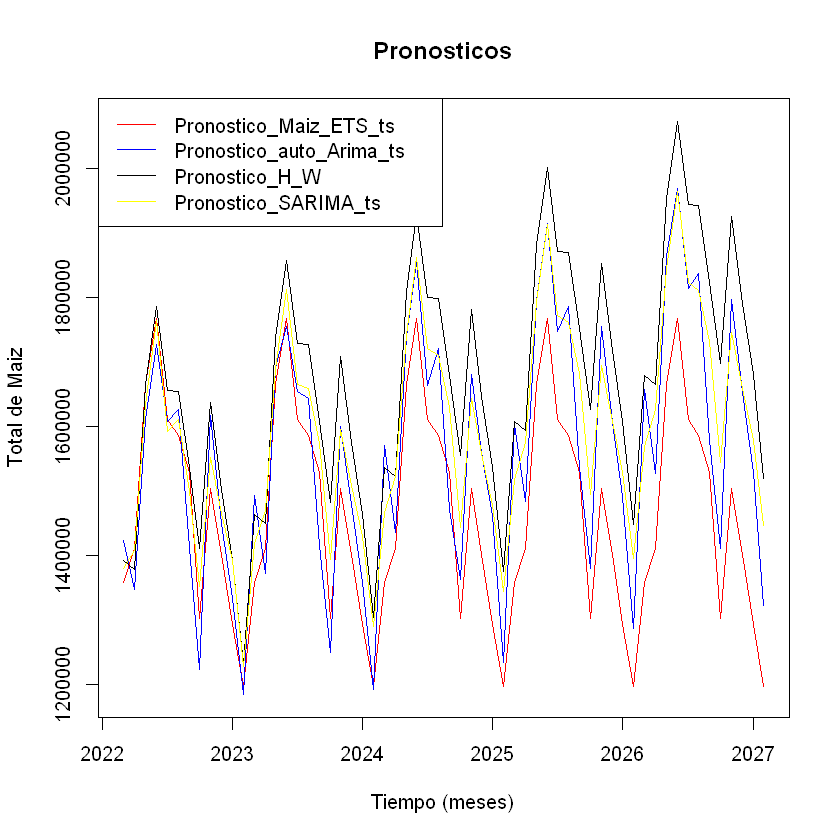

In [108]:
plot(Pronosticos, plot.type = "single", col = c("red", "blue","black","yellow"),
lwd=1:1, lty=1:1, ylab = "Total de Maiz", xlab="Tiempo (meses)",
main="Pronosticos")
legend(x="topleft", legend=c("Pronostico_Maiz_ETS_ts",
                             "Pronostico_auto_Arima_ts",
                            "Pronostico_H_W","Pronostico_SARIMA_ts"),
       col = c("red", "blue","black","yellow"), lty=1:1)

In [114]:
Pronostico_profeta <- ts(data.frame(Pronosticos) %>% mutate(Promedio =(Pronostico_Maiz_ETS_ts +Pronostico_auto_Arima_ts+Pronostico_H_W+Pronostico_SARIMA_ts)/4),
          frequency = 12, star = c(2022,3))
Pronostico_profeta_tabla <- data.frame(Pronostico_profeta)
Pronostico_profeta_tabla["Fecha"]=Fecha
Pronostico_profeta_tabla

Pronostico_Maiz_ETS_ts,Pronostico_auto_Arima_ts,Pronostico_H_W,Pronostico_SARIMA_ts,Promedio,Fecha
1358901,1423619,1392310,1380818,1388912,03/2022
1411741,1347140,1378603,1407499,1386246,04/2022
1665017,1610709,1666292,1634268,1644071,05/2022
1767237,1727214,1786091,1764574,1761279,06/2022
1611548,1607550,1656689,1592926,1617178,07/2022
1587120,1627400,1655248,1611840,1620402,08/2022
1528756,1413268,1536163,1499850,1494509,09/2022
1303272,1224287,1411248,1352351,1322790,10/2022
1504711,1618009,1637760,1552243,1578181,11/2022
1401595,1450403,1503188,1465990,1455294,12/2022
